<a href="https://colab.research.google.com/github/Sakshi-hub21/Deep-Learning-Projects/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import itertools

In [3]:
data = pd.read_csv("./news.csv")

In [4]:
data.shape

(6335, 4)

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data.isna().any().sum()

0

In [7]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
X = data['text']
X

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [10]:
y = data['label']
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [40]:
label = data.label.value_counts()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


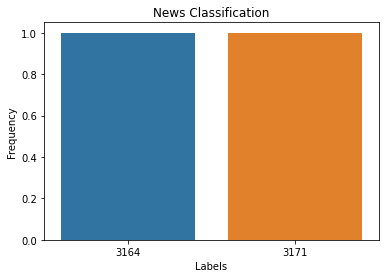

In [42]:
sns.countplot(label,data=data)
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("News Classification")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [31]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=2529)

In [13]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((4434,), (1901,), (4434,), (1901,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)

In [17]:
tfidf_train = tfidf.fit_transform(Xtrain)
tfidf_test = tfidf.transform(Xtest)

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [21]:
pac = PassiveAggressiveClassifier(max_iter=50)

In [22]:
pac.fit(tfidf_train,ytrain)

PassiveAggressiveClassifier(max_iter=50)

In [23]:
y_pred = pac.predict(tfidf_test)

In [24]:
y_pred

array(['FAKE', 'REAL', 'FAKE', ..., 'FAKE', 'FAKE', 'FAKE'], dtype='<U4')

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
confusion_matrix(ytest,y_pred)

array([[902,  50],
       [ 59, 890]])

In [36]:
accuracy_score(ytest,y_pred)

0.9426617569700158